In [51]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline

In [269]:
#As the data is delimited through Semi colon, we explicitly specify the separator using sep=
#In order to avoid file upload error, we have to use raw string 'r'

credit_df = pd.read_csv(r'D:\Sumant Data\MySQL\AIML\Ensemble Tech\Project\bank\bank-full.csv',sep=';')

In [232]:
credit_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [270]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [234]:
#Many attributes are stored as object which needs to be checked and treated

In [273]:
#There are unknown values in the job attribute, currently not applying any treatment
credit_df.groupby(['education']).count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [274]:
#Converting the job parameter into catagorical
credit_df['education'] = pd.Categorical(credit_df['education'])

In [275]:
#checking for marital status
credit_df.groupby('marital').count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
marital,,,,,,,,,,,,,,,,
divorced,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207
married,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214
single,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790


In [276]:
#As there are 3 categories of marital status, we convert them into categorical valriable & checking the info again
credit_df['marital'] = pd.Categorical(credit_df['marital'])

In [277]:
#Checking variable education for values and converting into categorical
credit_df.groupby('education').count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [278]:
#There is missing values in this column as well mentioned as unknown,. currently ignoring them for next iteration
credit_df['education'] = pd.Categorical(credit_df['education'])

In [279]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: category(2), int64(7), object(8)
memory usage: 5.3+ MB


In [280]:
#Variable default is for those custoemrs who defaulted on their loans, 
#checking the values if it an be categorized
credit_df.groupby('default').count()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
default,,,,,,,,,,,,,,,,
no,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396
yes,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815


In [281]:
#As the data is categorical and has no missing values, we convert it into categorical
credit_df['default'] = pd.Categorical(credit_df['default'])

In [282]:
#Checking data for housing
credit_df.groupby('housing').count()

,age,job,marital,education,default,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
housing,,,,,,,,,,,,,,,,
no,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081
yes,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130


In [283]:
#housing, is the bianary data for whether customer has taken housing loan or not, converting into categorical
credit_df['housing'] = pd.Categorical(credit_df['housing'])

In [284]:
#loan is also binary data describing whether the customer has any personal loan or notc
credit_df['loan'] = pd.Categorical(credit_df['loan'])


In [285]:
#Checking data for contact, it is communication type
credit_df.groupby('contact').count()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
contact,,,,,,,,,,,,,,,,
cellular,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285
telephone,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906
unknown,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020


In [286]:
#there are missing values in the data, however we do not treat them right now, just convert them into categorical
credit_df['contact'] = pd.Categorical(credit_df['contact'])

In [287]:
#checking the value of month which is object type
credit_df.groupby('month').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
month,,,,,,,,,,,,,,,,
apr,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932
aug,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247
dec,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
feb,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649
jan,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
jul,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895
jun,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
mar,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477
may,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766


In [288]:
credit_df['month'] = pd.Categorical(credit_df['month'])

In [289]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: category(7), int64(7), object(3)
memory usage: 3.8+ MB


In [290]:
#Checking the data for poutcome
credit_df.groupby(credit_df['poutcome']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
poutcome,,,,,,,,,,,,,,,,
failure,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901
other,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840
success,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511
unknown,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959


In [291]:
#Converting the poutcome data into categorical
credit_df['poutcome'] = pd.Categorical(credit_df['poutcome'])

In [292]:
#Finally checking the target variable 
credit_df.groupby(credit_df['y']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [293]:
#Converting it into categorical as there is no missing data
credit_df['y'] = pd.Categorical(credit_df['y'])

In [294]:
credit_df.groupby(credit_df['job']).count()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
admin.,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171
blue-collar,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732
entrepreneur,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
housemaid,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
management,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458
retired,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264
self-employed,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
services,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [295]:
credit_df['job'] = pd.Categorical(credit_df['job'])

In [296]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
y            45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [396]:
#Creating a duplicate file for working
cdf= credit_df.copy()

In [397]:
cdf.groupby(['education']).count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857



All the object class variable are treated, now we proceed with 2nd deliverable "Exploratory Data Analysis"


In [398]:
#Analysis by Occupation: 
#Number of Occupations: Management is the occupation that is more prevalent in this dataset.
#Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
#Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts. 

In [399]:
#Exploring basic statistics of the dataframe
cdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [400]:
# There is no missing data in the dataset
#Age: Mean is higher than median, suggest there is skewness in the data, difference between 3rd quartile & max is higher
#Balance: Mean is significantly higher than median,analysis of IQR and min & max value suggest presence of outlier in the data
#Duration: Data is skewed towards left as difference between max value and 3rd quartile is higher than diff. between 1st quartile & min
#Possible outliers present in pdays and previous variable as well, we will check them now

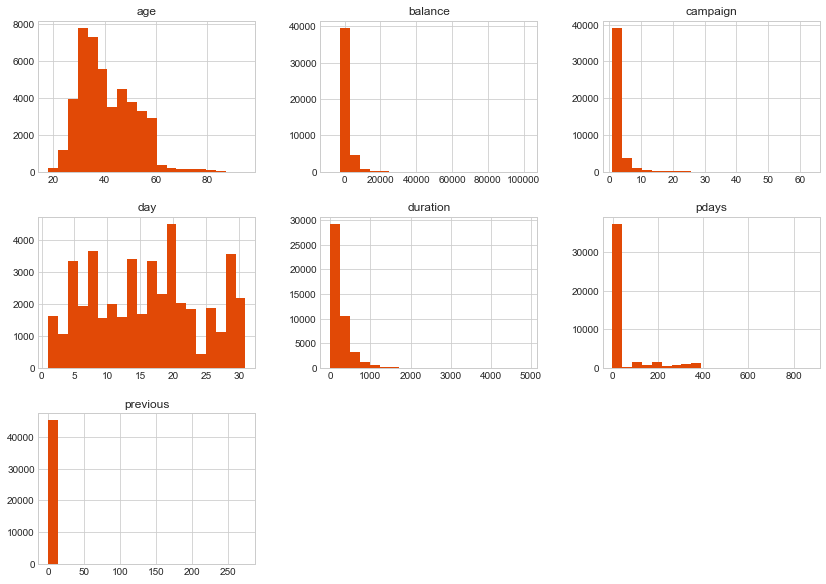

In [401]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

credit_df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [402]:
#Changing y as deposit for ease & dropping y column
cdf['deposit']=cdf['y']

In [403]:
cdf=cdf.drop("y",axis=1)

In [404]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
deposit      45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0,0,'tertiary'),
 Text(0,0,'secondary'),
 Text(0,0,'unknown'),
 Text(0,0,'primary')]

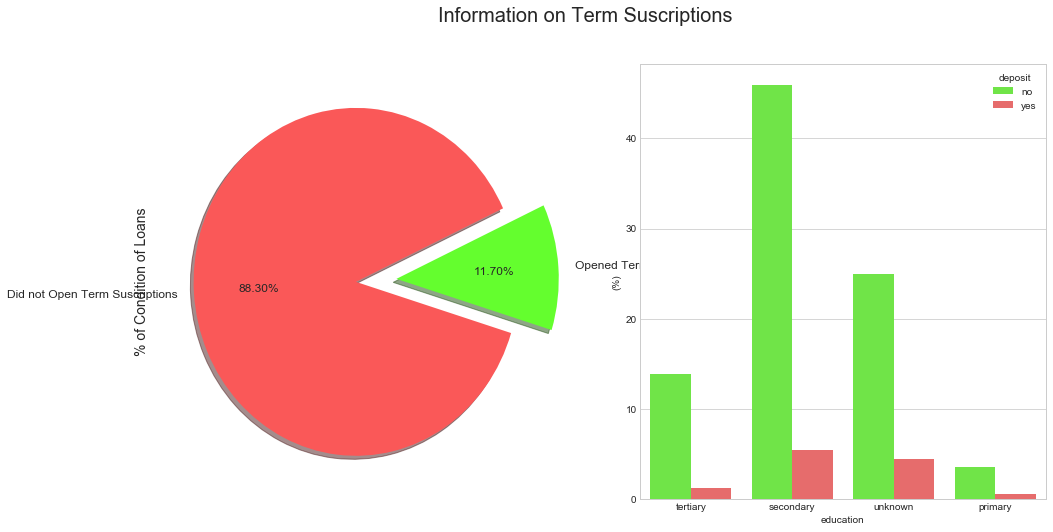

In [405]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

cdf["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)


palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=cdf, palette=palette, estimator=lambda x: len(x) / len(cdf) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(cdf["education"].unique(), rotation=0, rotation_mode="anchor")

In [406]:
#Unknown data point creating lots of noise in the data, however number of people opting for term plan are higher
cdf.groupby(cdf['education']).count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [407]:
cdf['education'] = cdf.drop(cdf.loc[cdf["education"] == "unknown"].index)

In [408]:
#analysis by Occupation: 
#Number of Occupations: Management is the occupation that is more prevalent in this dataset.
#Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
#Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts. 


In [409]:
# Drop the Job Occupations that are "Unknown"
cdf = cdf.drop(cdf.loc[cdf["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [cdf]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [410]:
cdf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A20E24D710>,
      dtype=object)

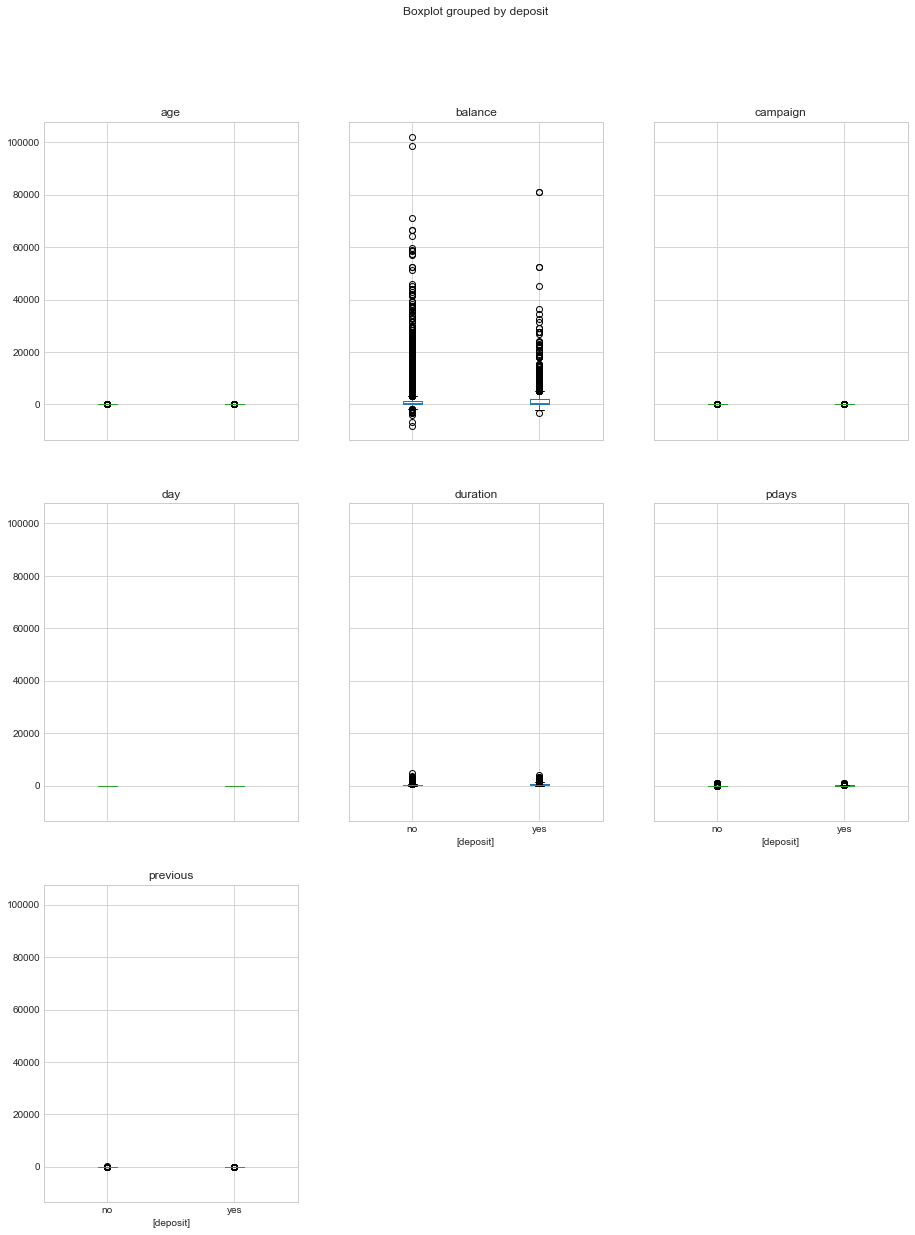

In [411]:
#Using Box plot for univariate analysis
cdf.boxplot(by = 'deposit',  figsize=(15, 20))

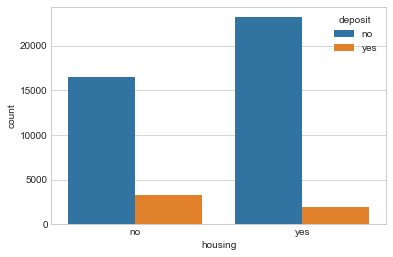

In [412]:
sns.countplot('housing',data=cdf,hue='deposit')
#people with no houseloan are more likely to buy deposit

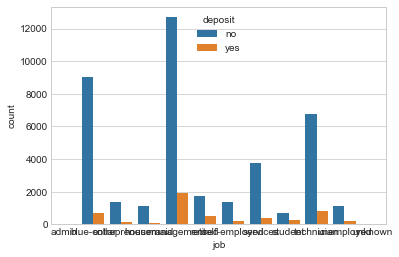

In [413]:
sns.countplot('job',data=cdf,hue='deposit',)


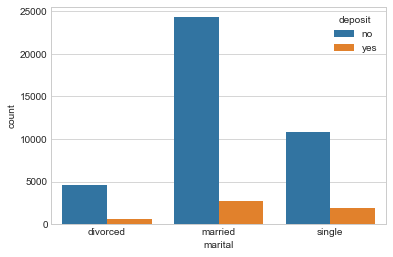

In [414]:
sns.countplot('marital',data=cdf,hue='deposit')
# married people are more likely to purchase term deposit; however divorce has a significant impact on deposit

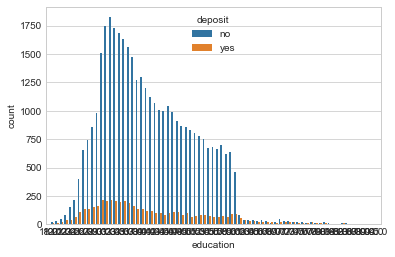

In [415]:
sns.countplot('education',data=cdf,hue='deposit')
#People with Secondary and tertiary education are more likely to purchase term deposit
#people with primary education & whose education is unknown are least likely to purchase the deposit
#hence we can drop the values with unknown education

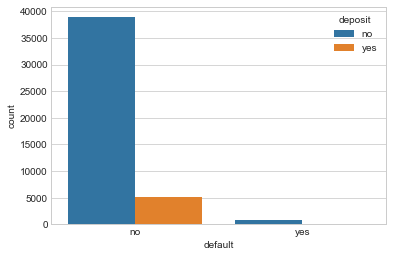

In [416]:
sns.countplot('default',data=cdf,hue='deposit')

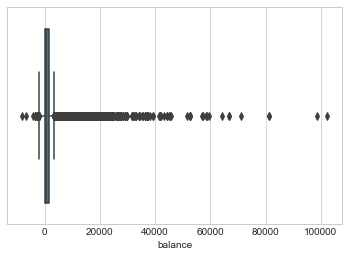

In [417]:
sns.boxplot('balance',data=cdf,hue = cdf['deposit'])
#Data is skewed towards higher end

In [418]:
cdf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



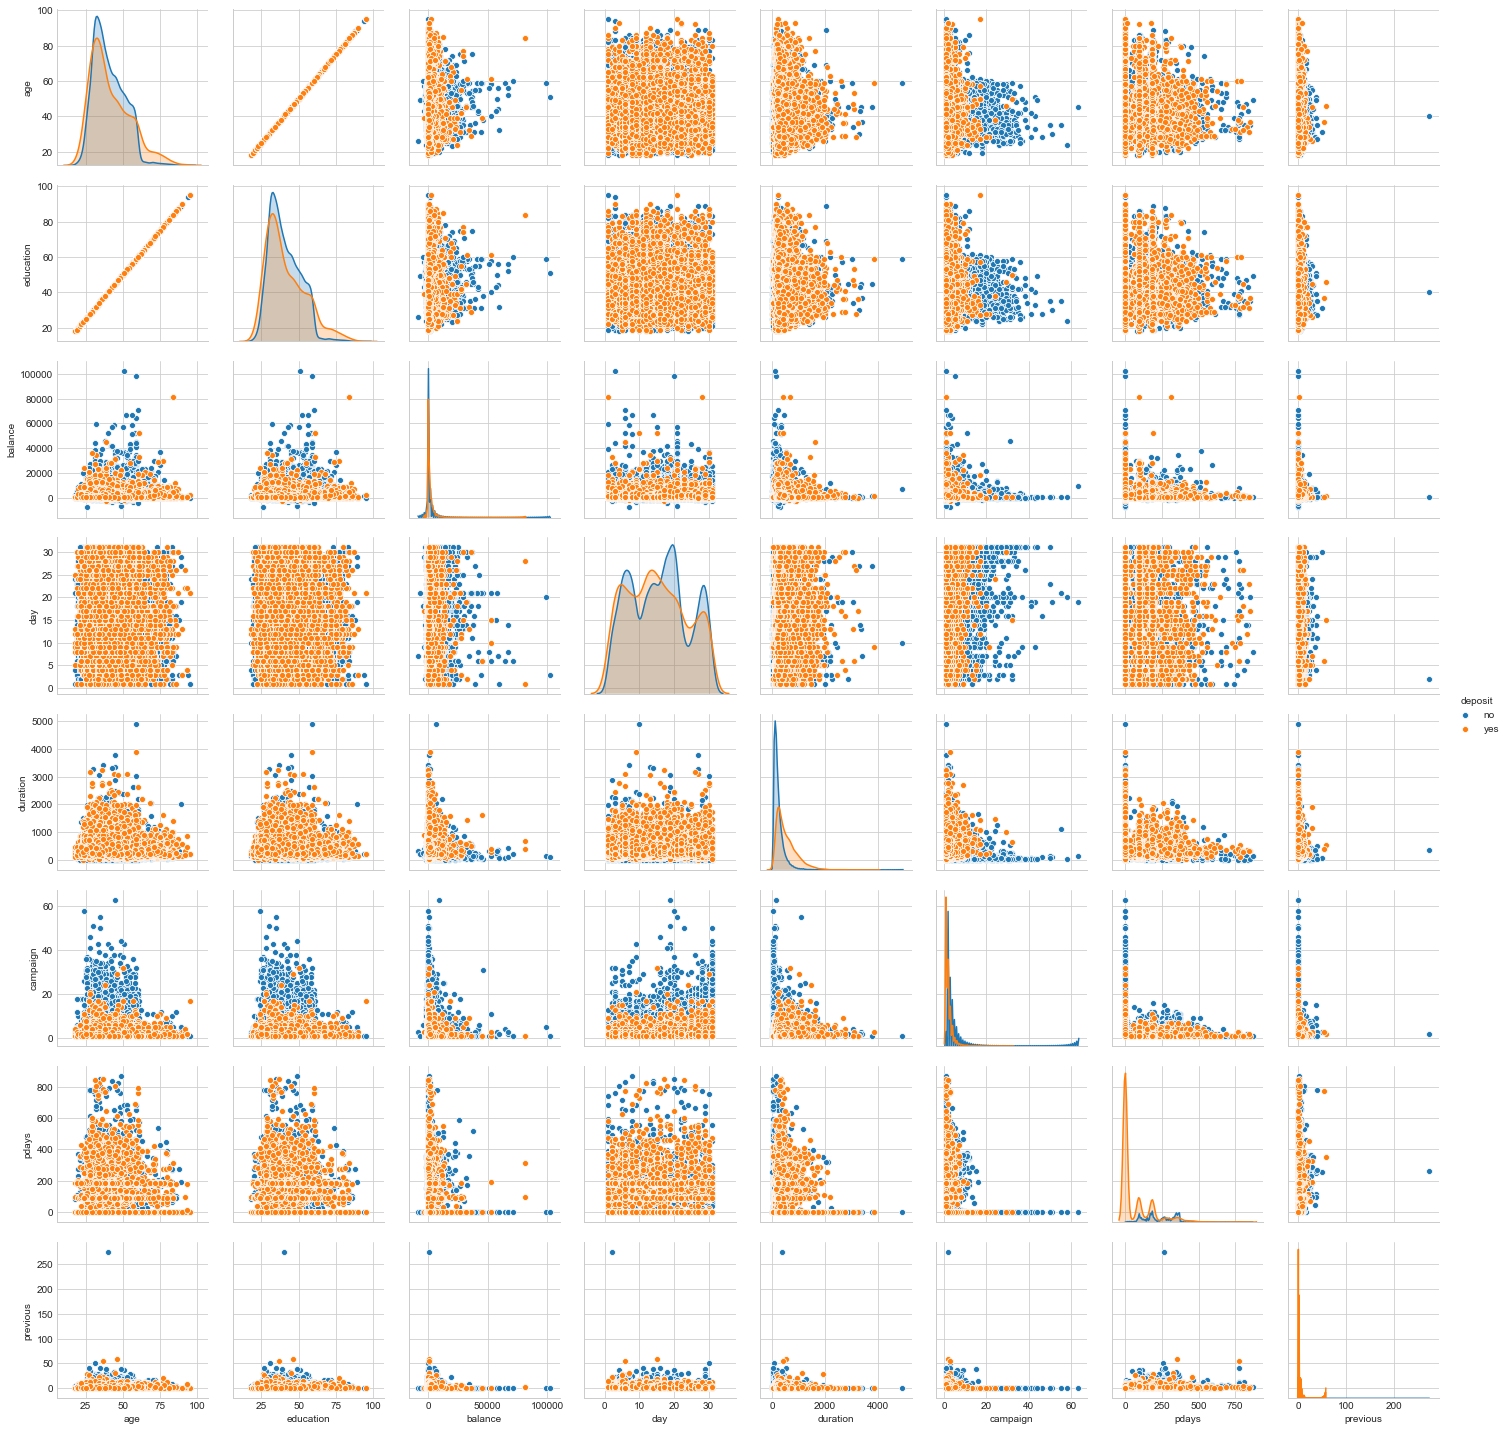

In [419]:
#using multivariate analysis to check the paier panel of the data
sns.pairplot(cdf,hue='deposit')

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



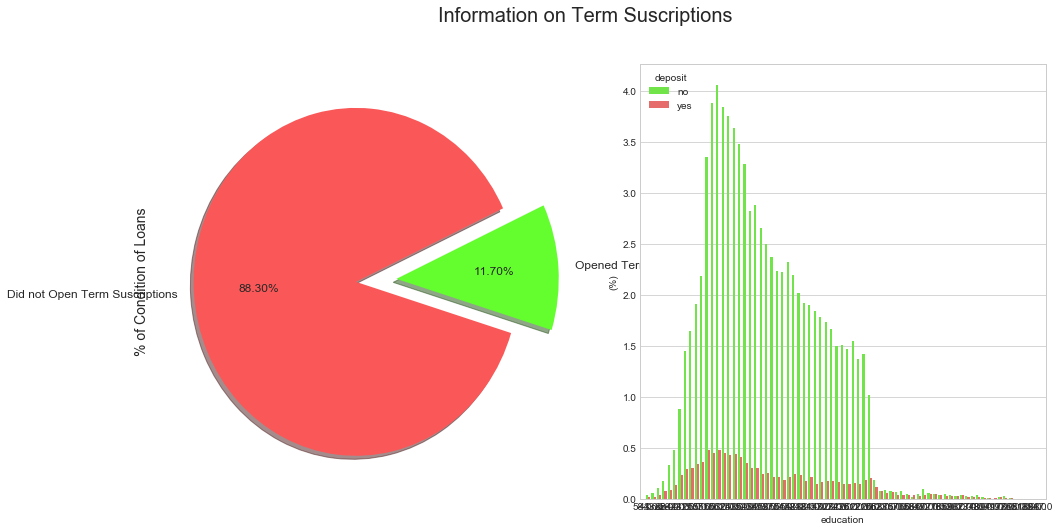

In [420]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

cdf["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=cdf, palette=palette, estimator=lambda x: len(x) / len(cdf) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(cdf["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

Text(0.5,1,'Correlation Matrix')

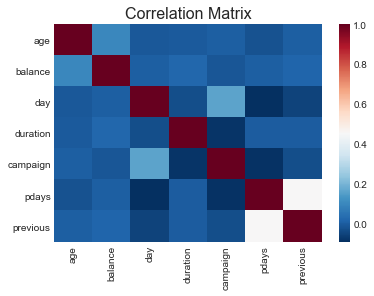

In [421]:
#No. of attributes are high hence pair plot doesnt show all attributes
#Hence u8sing correlation matrix
corr_numeric = cdf.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
#all the attributes are weakly correlated, hence we can say that attributes are not very strong predictor

In [334]:
from sklearn import preprocessing 

In [422]:
#creating duplicate copy of cdf
cdfe=cdf.copy()

In [423]:
le = preprocessing.LabelEncoder()

In [424]:
cdfe.groupby('deposit').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
deposit,,,,,,,,,,,,,,,,
no,39668,39668,39668,38172,39668,39668,39668,39668,39668,39668,39668,39668,39668,39668,39668,39668
yes,5255,5255,5255,5021,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255,5255


In [426]:
cdfe['deposit'] = cdfe.replacecece(cdfe[cdfe['deposit']=='yes'],1)

In [395]:
le.fit(cdfe['deposit'])

KeyError: 'deposit'

TypeError: 'LabelEncoder' object is not subscriptable

In [326]:
#Creating train & test dataset
train_char_label = ['No', 'Yes']

In [383]:
cdfe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,58,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,44,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,33,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,35,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [386]:
cdf = cdfe.drop('education',axis=1)

In [391]:
X = cdfe.drop("deposit", axis=1)

y = cdfe.pop("deposit")

KeyError: "['deposit'] not found in axis"

In [389]:
cdfhe = pd.get_dummies(X)

In [390]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,58,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,44,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,33,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
5,35,management,married,35,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown


In [328]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [329]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [330]:
dt_model.fit(X_train, train_labels)

ValueError: could not convert string to float: 'no'